In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings('ignore')

In [95]:
traindata = pd.read_csv("mobile/train.csv")
testdata = pd.read_csv('mobile/test.csv')

In [96]:
traindata.columns
columns = traindata.columns
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

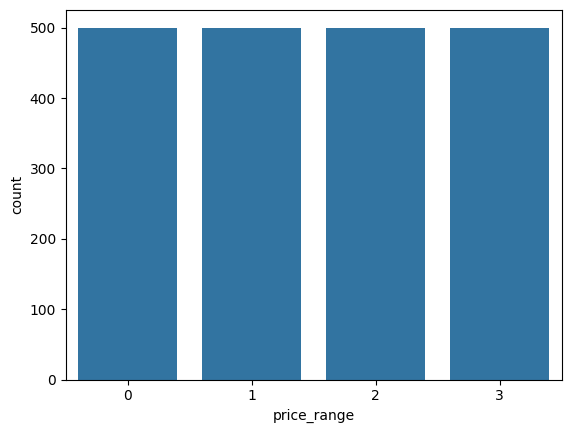

In [97]:
sns.countplot(x=traindata['price_range'])
plt.show()

In [98]:
corr = traindata.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


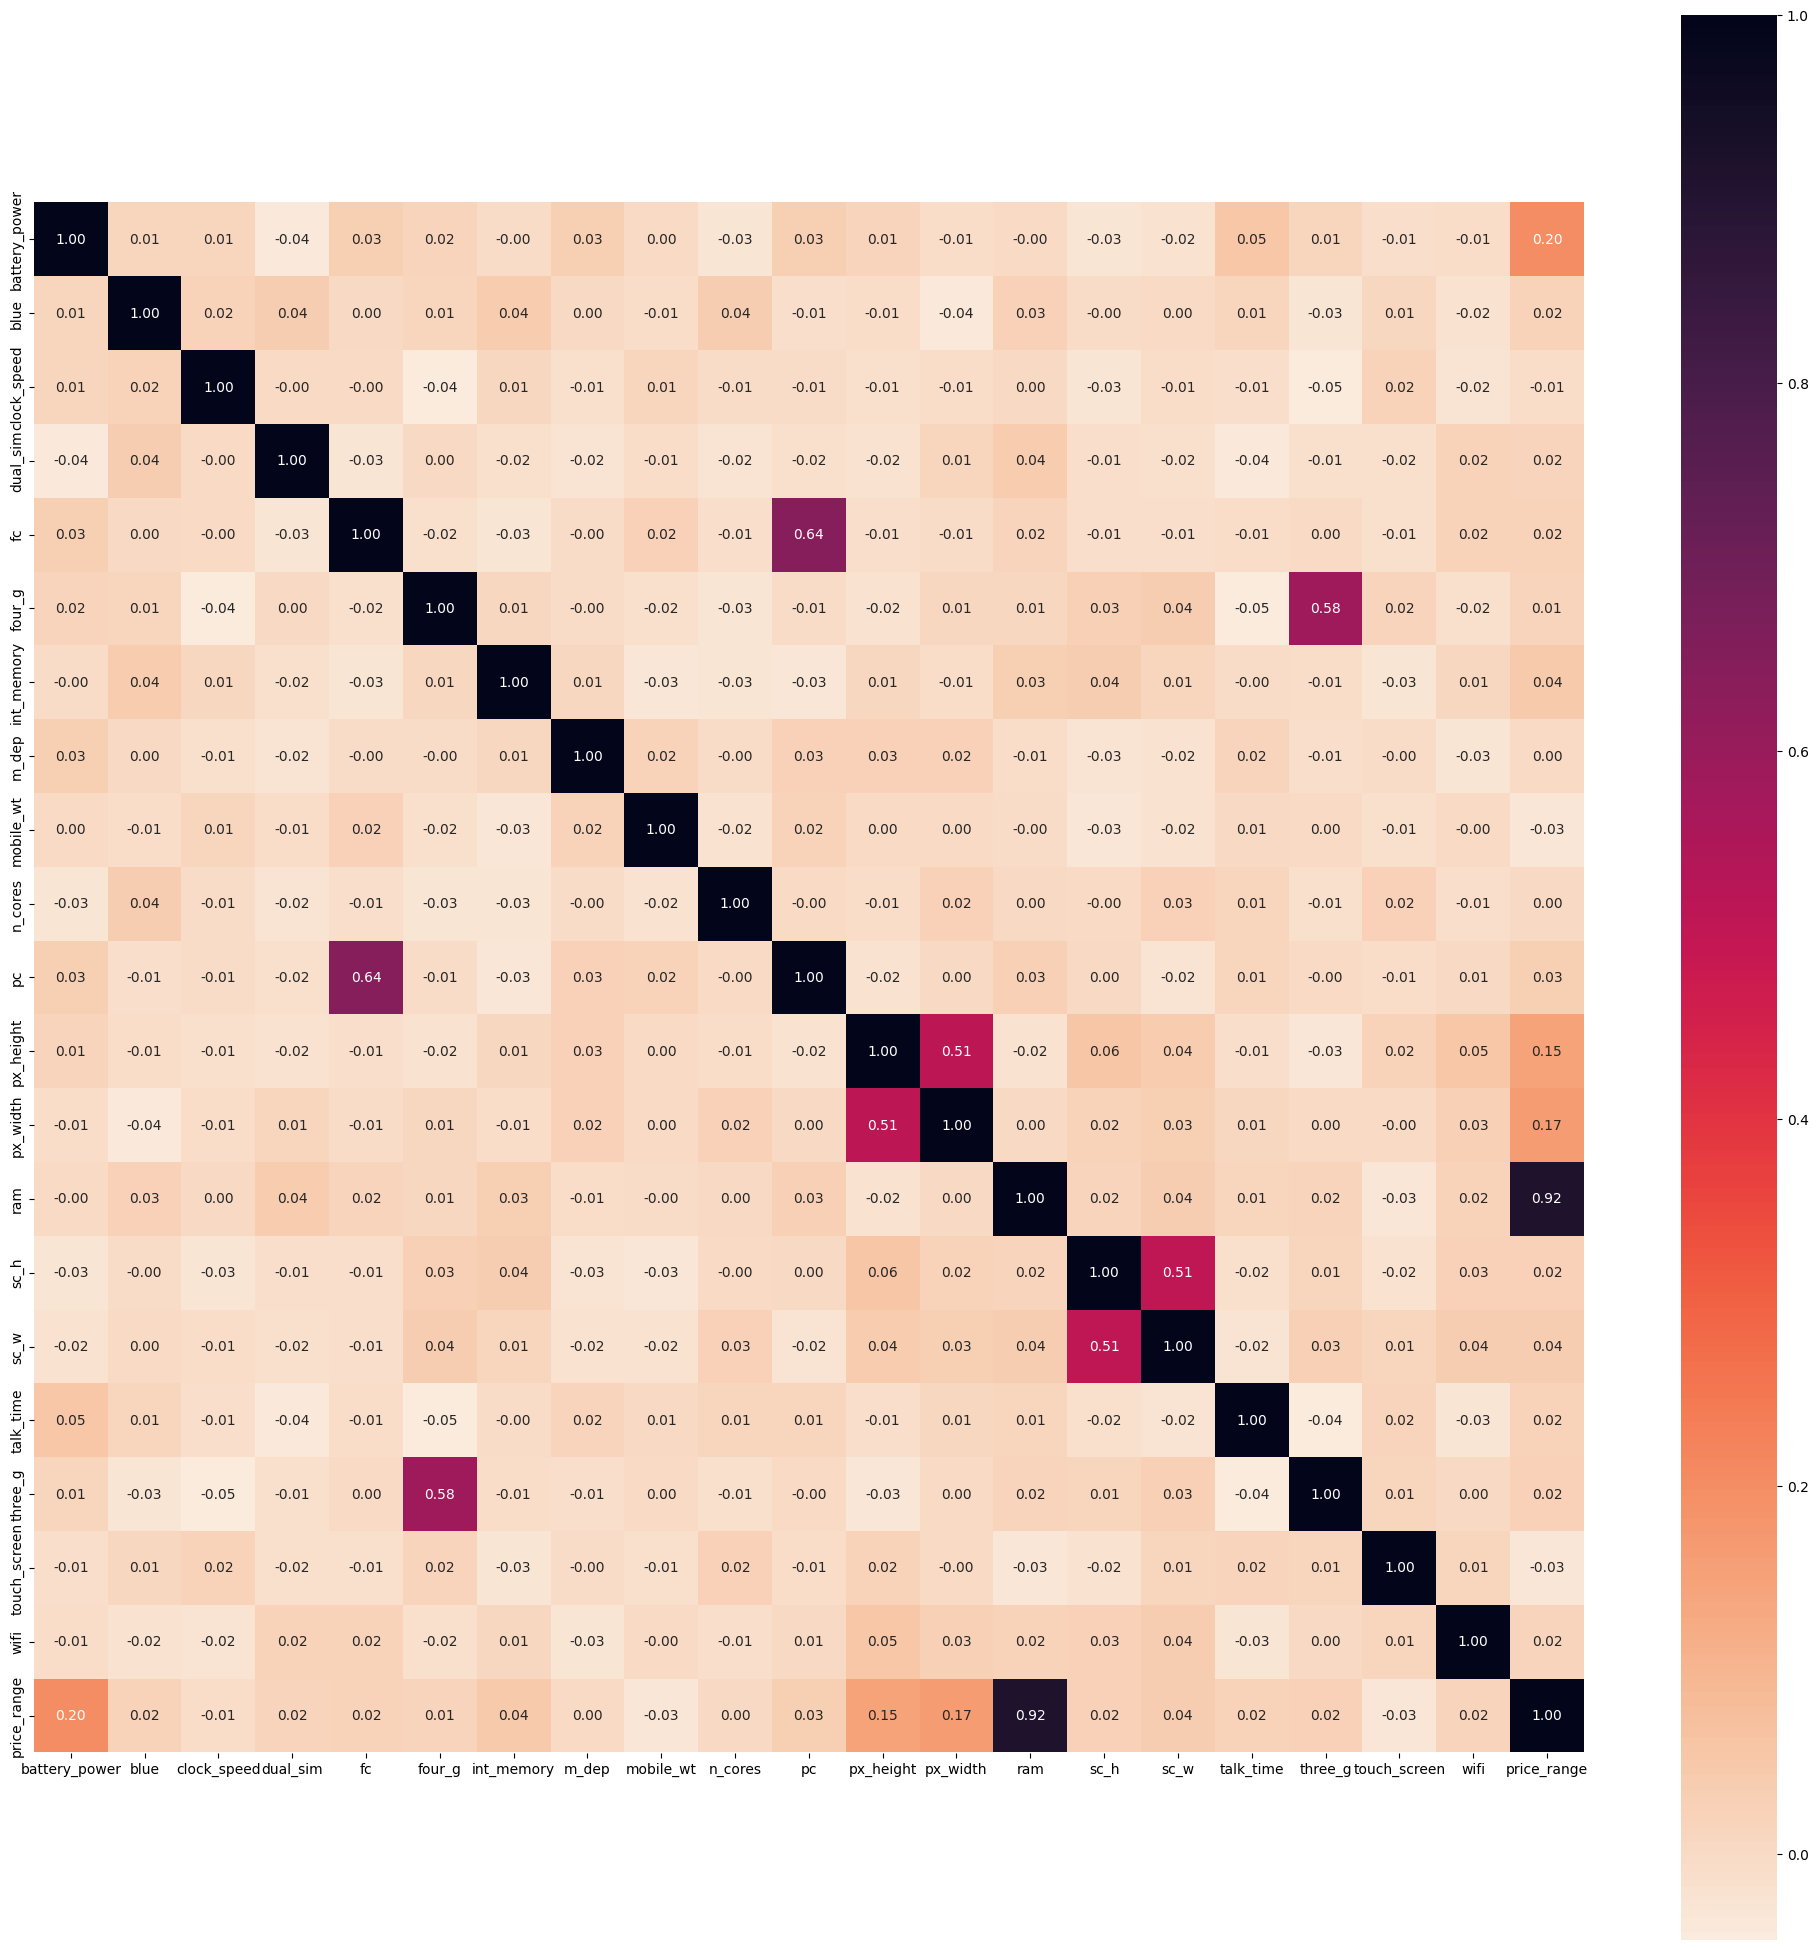

In [99]:
plt.figure(figsize=((25, 25)))
sns.heatmap(corr, cmap='rocket_r', annot=True, square=True, fmt='0.2f')
plt.show()

In [100]:
# sns.pairplot(traindata)
# plt.show()

In [101]:
Data = traindata.values

In [102]:
trainX = Data[:, :-1]
trainY = Data[:, -1].reshape((traindata.shape[0], 1))

In [103]:
trainX.shape
trainY.shape

(2000, 1)

In [104]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures

SelectKBest(score_func=<function chi2 at 0x000001D98E299800>)

In [105]:
fit = bestfeatures.fit(trainX, trainY)

In [106]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [107]:
dfscr = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(columns[:-1])

In [108]:
data = pd.concat([dfcol, dfscr], axis=1)

In [109]:
data.columns = ["features", 'Score']
data = data.sort_values(by='Score', ascending=False)
tenfeatures = data.head(n=10)['features'].values
tenfeatures

array(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h'], dtype=object)

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
model = RandomForestClassifier()
model.fit(trainX, trainY)

RandomForestClassifier()

In [112]:
model.feature_importances_

array([0.07408425, 0.00681354, 0.0279836 , 0.00669685, 0.02512582,
       0.00674136, 0.03816264, 0.02537272, 0.04086934, 0.02347838,
       0.03106193, 0.05404911, 0.05956705, 0.47460493, 0.02751439,
       0.02776136, 0.03108861, 0.00566213, 0.00661336, 0.00674862])

In [113]:
indices = dfcol.values.reshape((-1,))
randomF = pd.DataFrame(model.feature_importances_, index=indices, columns=["Importance"])
randomF

,Importance
battery_power,0.074084
blue,0.006814
clock_speed,0.027984
dual_sim,0.006697
fc,0.025126
four_g,0.006741
int_memory,0.038163
m_dep,0.025373
mobile_wt,0.040869
n_cores,0.023478


In [114]:
randomF = randomF.sort_values(by='Importance', ascending=False)
randomF.head(n=10).index.values

array(['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt',
       'int_memory', 'talk_time', 'pc', 'clock_speed', 'sc_w'],
      dtype=object)

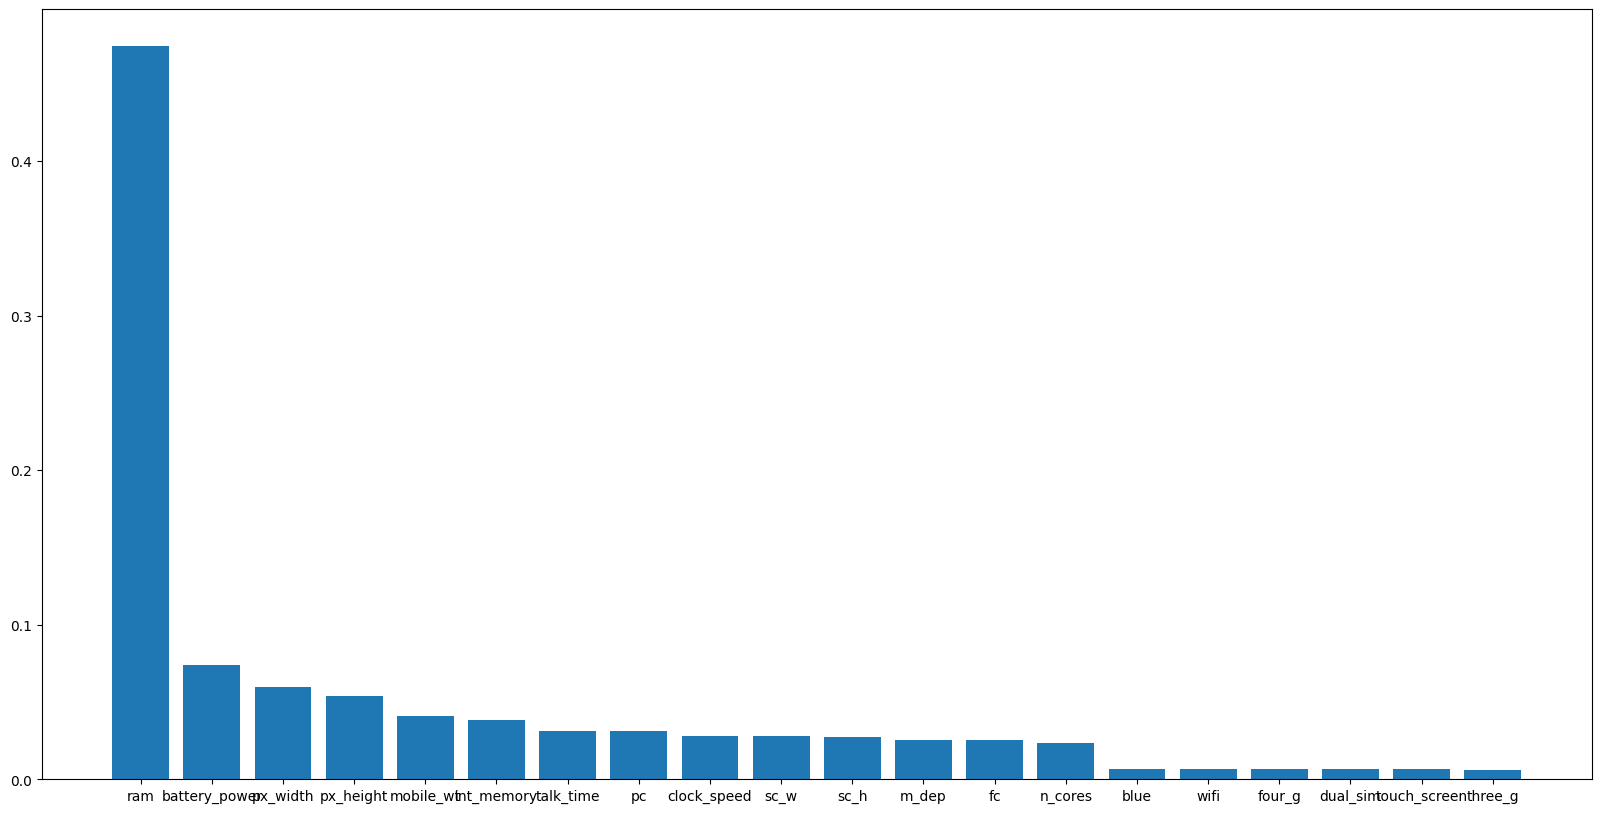

In [115]:
plt.figure(figsize=(20, 10))
plt.bar(randomF.index, randomF['Importance'])
plt.show()

In [116]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
def testing(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report: \n')
    print(classification_report(y_test, y_pred))
    t1.plot()

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       500
         1.0       1.00      1.00      1.00       500
         2.0       1.00      1.00      1.00       500
         3.0       1.00      1.00      1.00       500

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



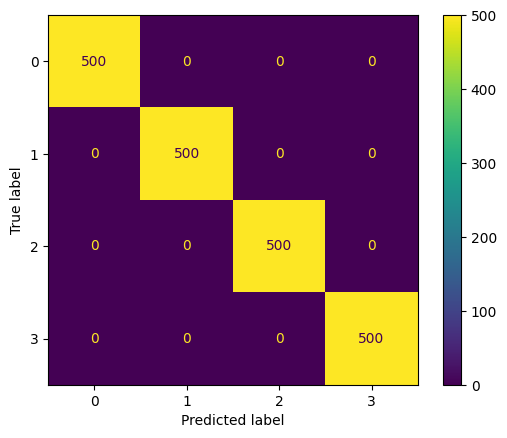

In [117]:
y_pred = model.predict(trainX)
testing('Classification Report', trainY, y_pred)

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
rfc = RandomForestClassifier()

In [120]:
score = cross_val_score(rfc, trainX, trainY, cv=10)
score

array([0.89 , 0.85 , 0.9  , 0.855, 0.905, 0.905, 0.86 , 0.9  , 0.86 ,
       0.87 ])

In [121]:
score.mean()

0.8795

In [122]:
trainX = pd.DataFrame(trainX, columns=traindata.iloc[:, :-1].columns)
trainX[randomF.head(n=10).index.values]

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,talk_time,pc,clock_speed,sc_w
0,2549.0,842.0,756.0,20.0,188.0,7.0,19.0,2.0,2.2,7.0
1,2631.0,1021.0,1988.0,905.0,136.0,53.0,7.0,6.0,0.5,3.0
2,2603.0,563.0,1716.0,1263.0,145.0,41.0,9.0,6.0,0.5,2.0
3,2769.0,615.0,1786.0,1216.0,131.0,10.0,11.0,9.0,2.5,8.0
4,1411.0,1821.0,1212.0,1208.0,141.0,44.0,15.0,14.0,1.2,2.0
...,...,...,...,...,...,...,...,...,...,...
1995,668.0,794.0,1890.0,1222.0,106.0,2.0,19.0,14.0,0.5,4.0
1996,2032.0,1965.0,1965.0,915.0,187.0,39.0,16.0,3.0,2.6,10.0
1997,3057.0,1911.0,1632.0,868.0,108.0,36.0,5.0,3.0,0.9,1.0
1998,869.0,1512.0,670.0,336.0,145.0,46.0,19.0,5.0,0.9,10.0


In [123]:
import warnings
warnings.filterwarnings('ignore')
score = cross_val_score(rfc, trainX, trainY, cv=10)


In [124]:
score.mean()

0.877